<a href="https://colab.research.google.com/github/denys-khvashchenko/Sales_Performance_Analysis-Key_Insights_and_Recommendations/blob/main/Python_for_DA_Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount("/content/drive")

events_csv = "/content/drive/MyDrive/Mate_homework/events.csv"
products_csv = "/content/drive/MyDrive/Mate_homework/products.csv"
countries_csv = "/content/drive/MyDrive/Mate_homework/countries.csv"

events = pd.read_csv(events_csv)
products = pd.read_csv(products_csv)
countries = pd.read_csv(countries_csv)

print(events.info())
print(events.shape)
print("\n")

print(products.info())
print(products.shape)
print("\n")

print(countries.info())
print(countries.shape)
print("\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB
None
(1330, 10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
-

### Опис стовпців:
  * Таблиця **events**:
* **Order ID**: Унікальний ідентифікатор замовлення.
* **Order Date**: Дата замовлення.
* **Ship Date**: Дата відправлення.
* **Order Priority**: Приорітет замовлення.
* **Country Code**: Трьохлітерний код країниб куди було відправлено замовлення.
* **Product ID**: Ідентифікатор продукту.
* **Sales Channel**: Канал продажу.
* **Unit Sold**: Кількість продани одиниць.
* **Unit Price**: Ціна за одиницю товару.
* **Unit Cost**: Собівартість одиниці товару.
  * Таблиця **products**:
* **id**: Ідентифікатор продукту.
* **item_type**: Тип продукту.
  * Таблиця **countries**:
* **name**: Назва країни.
* **alpha-2**: Двохлітерний код країни.
* **alpha-3**: Трьохлітерний код країни.
* **region**: Регіон.
* **sub-region**: Підрегіон.

### Ключові поля:
* **Product ID** у таблиці **events** та **id** у таблиці **products** для поєднання інформації про замовлення та продукти.
* **Country Code** у таблиці events та **alpha-3** у таблиці **countries** для поєднання інформації про замовлення та країни.

In [ ]:
print(events.isna().sum() / events.shape[0] * 100)
print("\n")

print(products.isna().sum() / products.shape[0] * 100)
print("\n")

print(countries.isna().sum() / countries.shape[0] * 100)

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


id           0.0
item_type    0.0
dtype: float64


name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [ ]:
events = events.dropna()
countries = countries.dropna()

print(events.isna().sum())
print("\n")

print(products.isna().sum())
print("\n")

print(countries.isna().sum())

Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64


id           0
item_type    0
dtype: int64


name          0
alpha-2       0
alpha-3       0
region        0
sub-region    0
dtype: int64


### Видалення та заповнення пропущених значень:
  * **Видалення**:
*  Колонка **"Units Sold"** є ключовою для аналізу продажів, тому відсутність даних в ній робить рядок непридатним для використання. У колонці **"Units Sold"** було виявлено **2** пропущені значення з **1330** записів, що становить **0.15%**. Заповнення медіанним, модальним або середнім значенням не має сенсу, оскільки це може спотворити результати аналізу через малу кількість пропусків.
* Аналогічно, інші колонки, що містять незначну кількість пропусків та не підлягають логічному заповненню, також були видалені для забезпечення коректності аналізу.
  * **Загальний висновок**:
* Обробка пропущених значень шляхом видалення дозволила забезпечити чистоту даних для подальшого аналізу та мінімізувати спотворення результатів через наявність неповної інформації. Видалення було застосовано до тих рядків, де відсутність інформації робила їх повністю непридатними для аналізу, або ж логічне заповнення було неможливим.

In [ ]:
print(events.dtypes)
print("\n")

print(products.dtypes)
print("\n")

print(countries.dtypes)

Order ID            int64
Order Date         object
Ship Date          object
Order Priority     object
Country Code       object
Product ID          int64
Sales Channel      object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
dtype: object


id            int64
item_type    object
dtype: object


name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object


In [ ]:
# перетворення типів даних
events['Units Sold'] = events['Units Sold'].astype('int64')
events['Order Date'] = pd.to_datetime(events['Order Date'])
events['Ship Date'] = pd.to_datetime(events['Ship Date'])

print(events.dtypes)
print("\n")

print(products.dtypes)
print("\n")

print(countries.dtypes)

Order ID                   int64
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Order Priority            object
Country Code              object
Product ID                 int64
Sales Channel             object
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
dtype: object


id            int64
item_type    object
dtype: object


name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object


In [ ]:
# приведення назв стовпців в snake_case
def to_snake_case(df):
  snake_case_columns = []
  for col in df.columns:
    col = col.strip()
    col = col.lower()
    col = col.replace(" ", "_")
    col = col.replace("-", "_")
    snake_case_columns.append(col)
  df.columns = snake_case_columns
  return df

events = to_snake_case(events)
products = to_snake_case(products)
countries = to_snake_case(countries)

# очищення та приведення рядків для пошуку дублікатів
def normalize_text(df):
  return df.apply(lambda x: x.str.strip().str.title() if x.dtype == "object" else x)

events = normalize_text(events)
products = normalize_text(products)
countries = normalize_text(countries)

print(f"Кількість дублікатів в events: {events.duplicated().sum()}")
print(f"Кількість дублікатів в products: {products.duplicated().sum()}")
print(f"Кількість дублікатів в countries: {countries.duplicated().sum()}")

Кількість дублікатів в events: 0
Кількість дублікатів в products: 0
Кількість дублікатів в countries: 0


In [ ]:
data = events.merge(products, left_on="product_id", right_on="id", how="left")
data = data.merge(countries, left_on="country_code", right_on="alpha_3", how="left")

print(data.isna().sum())

order_id          0
order_date        0
ship_date         0
order_priority    0
country_code      0
product_id        0
sales_channel     0
units_sold        0
unit_price        0
unit_cost         0
id                0
item_type         0
name              0
alpha_2           0
alpha_3           0
region            0
sub_region        0
dtype: int64


In [ ]:
# видалення непотрібних стовпців
data = data.drop(["id", "alpha_3", "alpha_2", "country_code"], axis=1)

# переіменування стовпців
data = data.rename(columns={
    "name": "country"
})

In [ ]:
# загальні метрики
data["revenue"] = data["units_sold"] * data["unit_price"]
data["cost"] = data["units_sold"] * data["unit_cost"]
data["profit"] = data["revenue"] - data["cost"]

total_orders = data["order_id"].nunique()
total_revenue = data["revenue"].sum()
total_costs = data["cost"].sum()
total_profit = data["profit"].sum()
total_countries = data["country"].nunique()
total_products = data["item_type"]
average_check = data['revenue'].mean()
total_revenue = data['revenue'].sum()

print("Загальні метрики:")
print("Кількість замовлень:", total_orders)
print("Прибуток:", total_profit)
print("Охоплені країни:", total_countries)
print("Кількість товарів:", total_products)

print("\nМетрики продажів:")
print("Середній чек:", average_check)
print("Дохід:", total_revenue)
print("Витрати:", total_costs)
print("Валовий прибуток:", total_profit)

Загальні метрики:
Кількість замовлень: 1246
Прибуток: 473709035.06
Охоплені країни: 45
Кількість товарів: 0                Cereal
1                Cereal
2               Clothes
3             Beverages
4       Office Supplies
             ...       
1241             Fruits
1242          Beverages
1243          Baby Food
1244          Cosmetics
1245          Household
Name: item_type, Length: 1246, dtype: object

Метрики продажів:
Середній чек: 1283293.5483627608
Дохід: 1598983761.26
Витрати: 1125274726.1999998
Валовий прибуток: 473709035.06


In [ ]:
# географічні метрики
orders_by_country = data.groupby('country')['order_id'].count()
profit_by_country = data.groupby('country')['revenue'].sum()
profit_by_region = data.groupby('region')['revenue'].sum()

print("\nГеографія:")
print("Замовлення за регіоном:\n", profit_by_region)
print("Замовлення за країною:\n", orders_by_country)
print("Прибуток за країною:\n", profit_by_country)


Географія:
Замовлення за регіоном:
 region
Asia      9.333089e+07
Europe    1.505653e+09
Name: revenue, dtype: float64
Замовлення за країною:
 country
Albania                   21
Andorra                   40
Armenia                   29
Austria                   28
Belarus                   28
Belgium                   26
Bosnia And Herzegovina    33
Bulgaria                  30
Croatia                   17
Cyprus                    30
Czech Republic            31
Denmark                   26
Estonia                   23
Finland                   23
France                    26
Georgia                   23
Germany                   26
Greece                    32
Hungary                   25
Iceland                   23
Ireland                   30
Italy                     30
Latvia                    27
Liechtenstein             24
Lithuania                 25
Luxembourg                28
Macedonia                 32
Malta                     32
Monaco                    13
Montene

In [ ]:
# метрики каналів продажів
orders_by_channel = data.groupby('sales_channel')['order_id'].count()
profit_by_channel = data.groupby('sales_channel')['revenue'].sum()

# часові метрики
data['delivery_time'] = (data['ship_date'] - data['order_date']).dt.days
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data["day_of_week"] = data["order_date"].dt.day_name()
data["day_of_week"] = pd.Categorical(data["day_of_week"], categories=days_order, ordered=True)
data['day_of_week_num'] = data['day_of_week'].map({
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
})


average_delivery_time = data['delivery_time'].mean()

print("\nКанали продажів:")
print("Замовлення за каналом:\n", orders_by_channel)
print("Прибуток за каналом:\n", profit_by_channel)

print("\nЧас доставки:")
print("Середній час доставки:", f"{average_delivery_time:.2f}", "днів")


Канали продажів:
Замовлення за каналом:
 sales_channel
Offline    621
Online     625
Name: order_id, dtype: int64
Прибуток за каналом:
 sales_channel
Offline    8.100305e+08
Online     7.889533e+08
Name: revenue, dtype: float64

Час доставки:
Середній час доставки: 24.88 днів


In [ ]:
data.head()

,order_id,order_date,ship_date,order_priority,product_id,sales_channel,units_sold,unit_price,unit_cost,item_type,country,region,sub_region,revenue,cost,profit,delivery_time,day_of_week,day_of_week_num
0,100640618,2014-10-08,2014-10-18,M,2103,Online,650,205.70,117.11,Cereal,Norway,Europe,Northern Europe,133705.00,76121.50,57583.50,10,Wednesday,3
1,100983083,2016-08-11,2016-08-11,C,2103,Offline,1993,205.70,117.11,Cereal,Serbia,Europe,Southern Europe,409960.10,233400.23,176559.87,0,Thursday,4
2,102230632,2017-05-13,2017-06-13,L,2455,Online,1171,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe,127966.88,41968.64,85998.24,31,Saturday,6
3,103435266,2012-08-11,2012-09-18,H,1270,Offline,7648,47.45,31.79,Beverages,Serbia,Europe,Southern Europe,362897.60,243129.92,119767.68,38,Saturday,6
4,103450715,2015-03-15,2015-04-18,H,8681,Online,2220,651.21,524.96,Office Supplies,Slovakia,Europe,Eastern Europe,1445686.20,1165411.20,280275.00,34,Sunday,7


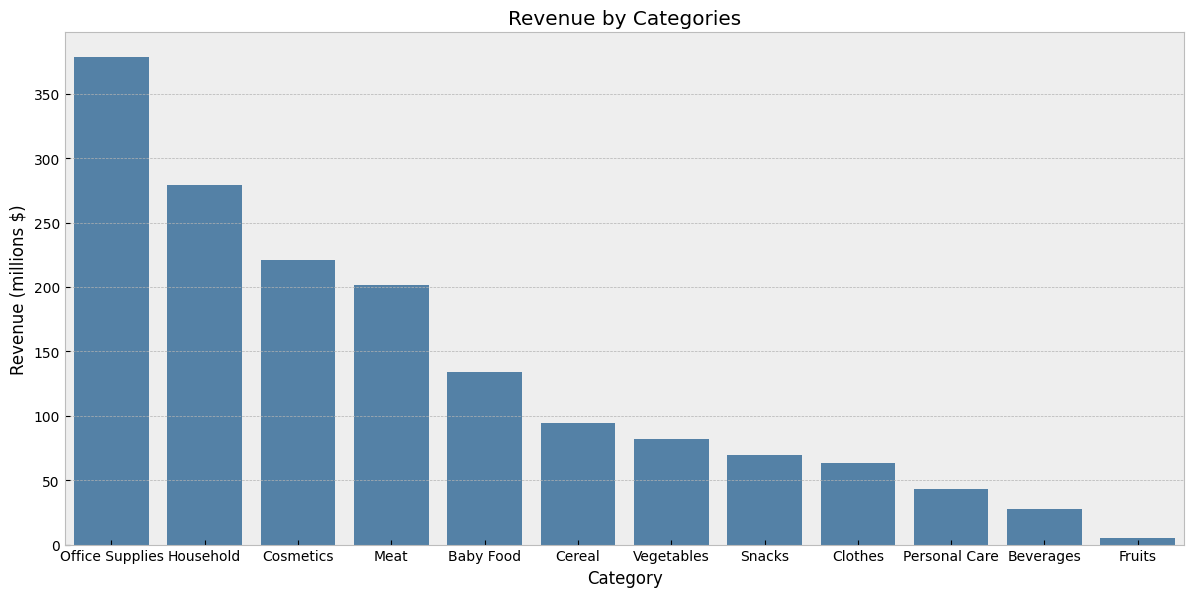

In [ ]:
revenue_by_categories = data.groupby("item_type")["revenue"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_categories, x="item_type", y="revenue", errorbar=("ci", False), color="steelblue")
plt.tight_layout()
plt.style.use("bmh")
plt.title("Revenue by Categories")
plt.xlabel("Category")
plt.ylabel("Revenue (millions $)")

plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))

plt.show()

Аналізуючи графік **"Revenue by Categories"**, можна зробити висновок, що найбільший дохід приносять категорії **office supplies**, **household** та **cosmetics**. Найменш прибутковими категоріями є **fruits**, **beverages** та **personal care items**.

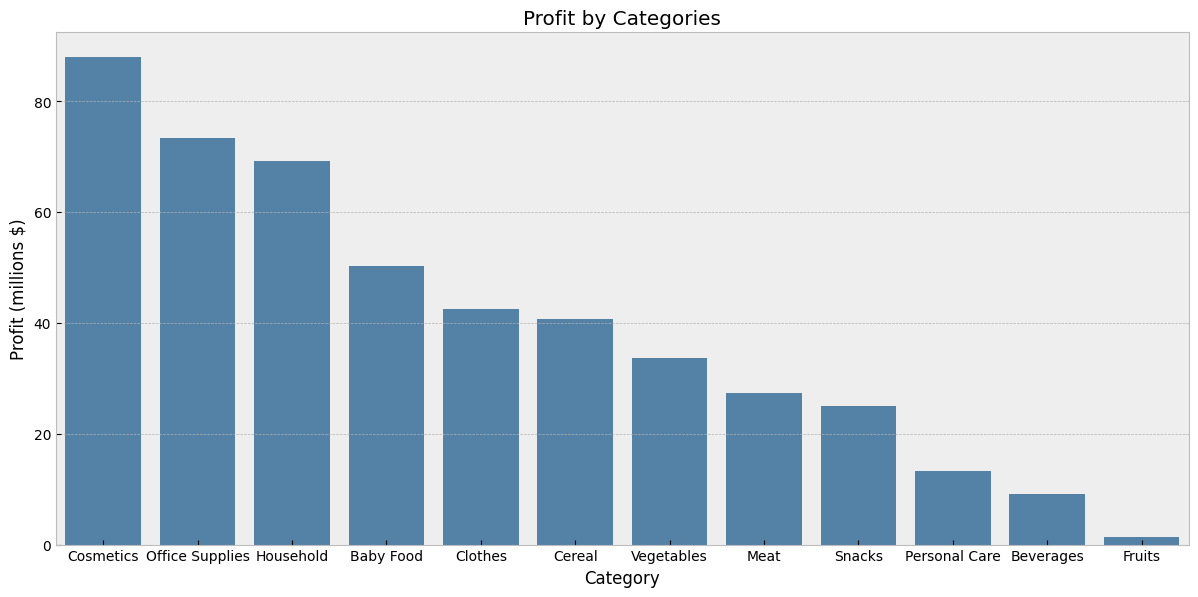

In [ ]:
profit_by_categories = data.groupby("item_type")["profit"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=profit_by_categories, x="item_type", y="profit", errorbar=("ci", False), color="steelblue")
plt.tight_layout()
plt.style.use("bmh")
plt.title("Profit by Categories")
plt.xlabel("Category")
plt.ylabel("Profit (millions $)")

plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))

plt.show()

Аналізуючи графік **"Profit by Categories"**, можна зробити висновок, що найбільший прибуток приносять категорії **cosmetics** та **office supplies**. Категорії **household** та **baby food** також демонструють досить високі показники прибутку. Найменш прибутковими категоріями є **beverages** та **fruits**.

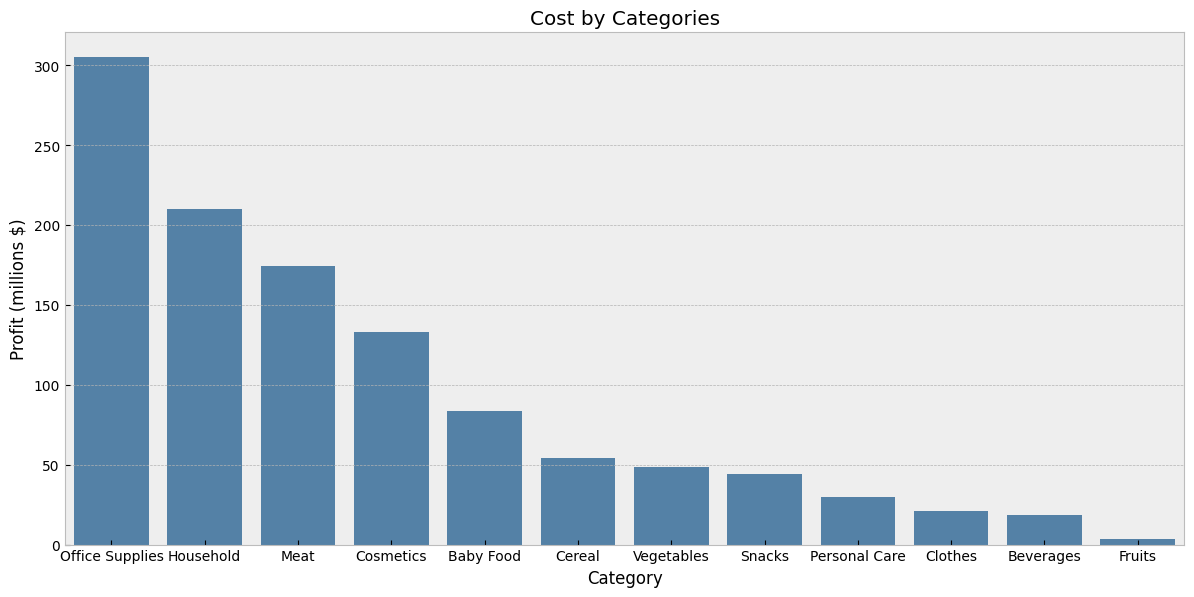

In [ ]:
revenue_by_categories = data.groupby("item_type")["cost"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_categories, x="item_type", y="cost", errorbar=("ci", False), color="steelblue")
plt.tight_layout()
plt.style.use("bmh")
plt.title("Cost by Categories")
plt.xlabel("Category")
plt.ylabel("Profit (millions $)")

plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))

plt.show()

Аналізуючи графік "**Cost by Categories**", можна зробити висновок, що найбільші витрати припадають на категорії **office supplies** та **household**. Категорії **meat** та **cosmetics** також мають досить високі показники витрат. Найменші витрати спостерігаються у категорій **fruits**, **beverages** та **clothes**.

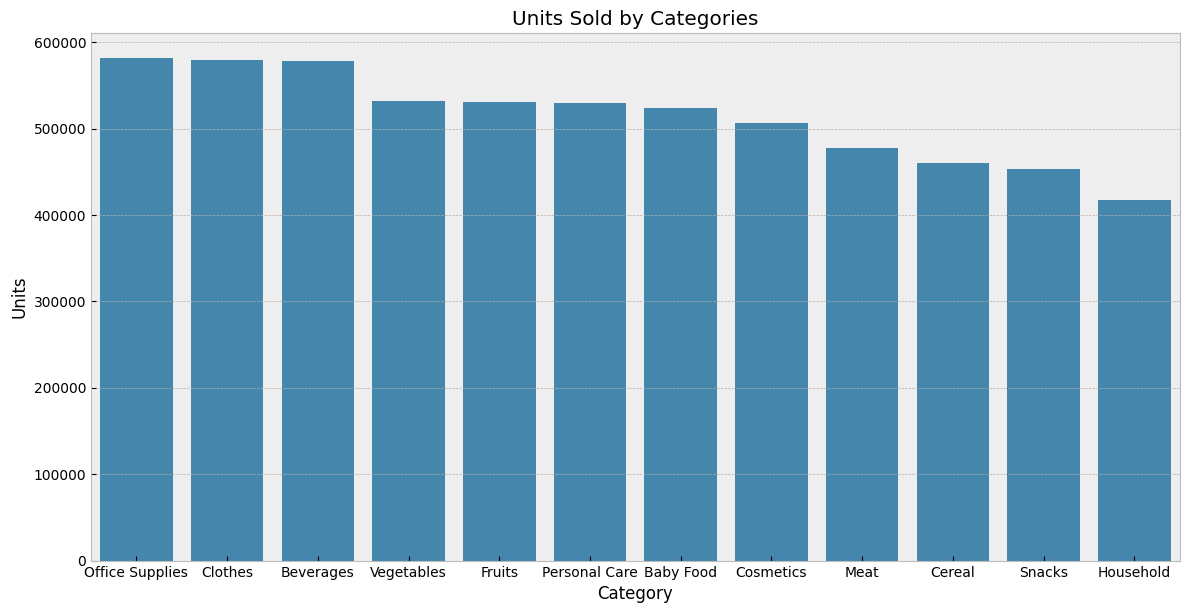

In [ ]:
popular_by_categories = data.groupby("item_type")["units_sold"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
plt.style.use("bmh")
sns.barplot(data=popular_by_categories, x="item_type", y="units_sold", errorbar=("ci", False))
plt.tight_layout()

plt.title("Units Sold by Categories")
plt.xlabel("Category")
plt.ylabel("Units")

plt.show()

Аналізуючи графік "**Units Sold by Categories**", можна зробити висновок, що найбільшу кількість проданих одиниць мають категорії **office supplies** та **beverages**. Категорії **fruits** та **clothes** також демонструють досить високі показники кількості проданих одиниць. Найменша кількість проданих одиниць спостерігається у категорій **household** та **cereal**.

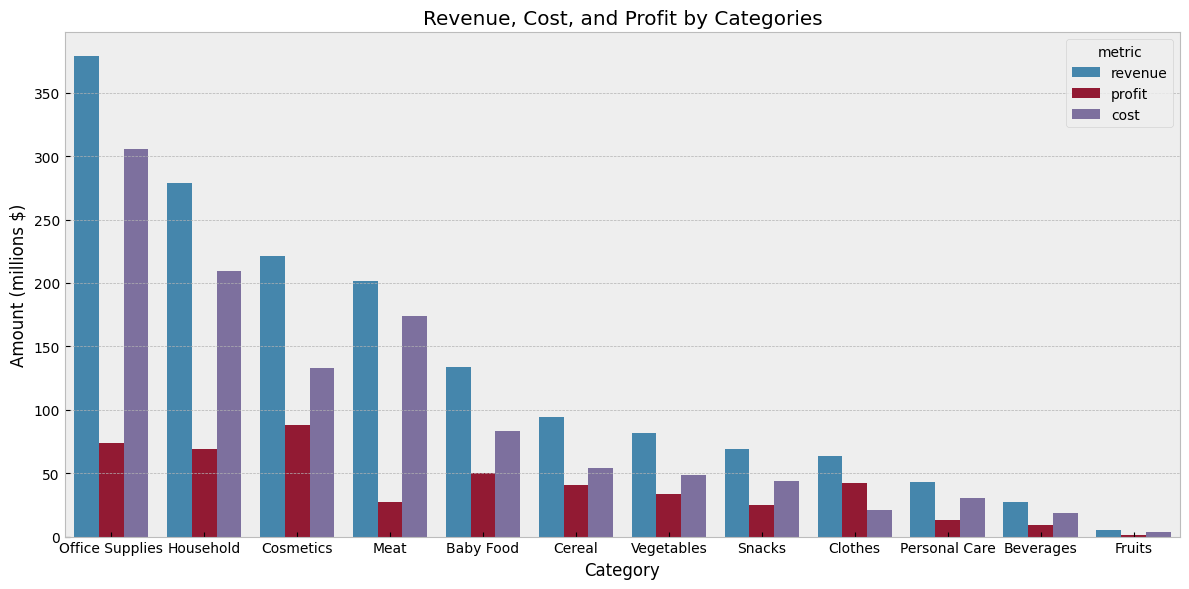

In [ ]:
amount_by_categories = data.groupby("item_type")[["revenue", "cost", "profit"]].sum().sort_values(by="revenue", ascending=False).reset_index()
amount_by_categories_melted = pd.melt(amount_by_categories,
                                      id_vars="item_type",
                                      value_vars=["revenue", "profit", "cost"],
                                      var_name="metric",
                                      value_name="amount")

plt.style.use("bmh")
plt.figure(figsize=(12, 6))
sns.barplot(data=amount_by_categories_melted, x="item_type", y="amount", hue="metric")
plt.title("Revenue, Cost, and Profit by Categories")
plt.xlabel("Category")
plt.ylabel("Amount (millions $)")
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))
plt.tight_layout()
plt.show()

Аналізуючи графік "**Revenue, Cost, and Profit by Categories**", можна зробити висновок, що найбільший дохід спостерігається у категорії **office supplies**. Проте, найбільший прибуток приносить категорія **cosmetics**, незважаючи на те, що її дохід є нижчим, ніж у **office supplies**. Це свідчить про те, що категорія **cosmetics** має нижчі витрати, що робить її більш ефективною з точки зору прибутку. Категорія **household** також демонструє досить високі показники доходу та прибутку, але з більшими витратами, ніж **cosmetics**. Категорія **meat** має схожі тенденції щодо доходу та прибутку з **household**, але з меншими витратами. Найменш прибутковими категоріями є **fruits** та **beverages**, що також мають найнижчі показники доходу та витрат. Важливо зазначити, що category **office supplies** є лідером за показником доходу, але category **cosmetics** є лідером за показником прибутку, що свідчить про її більшу ефективність.

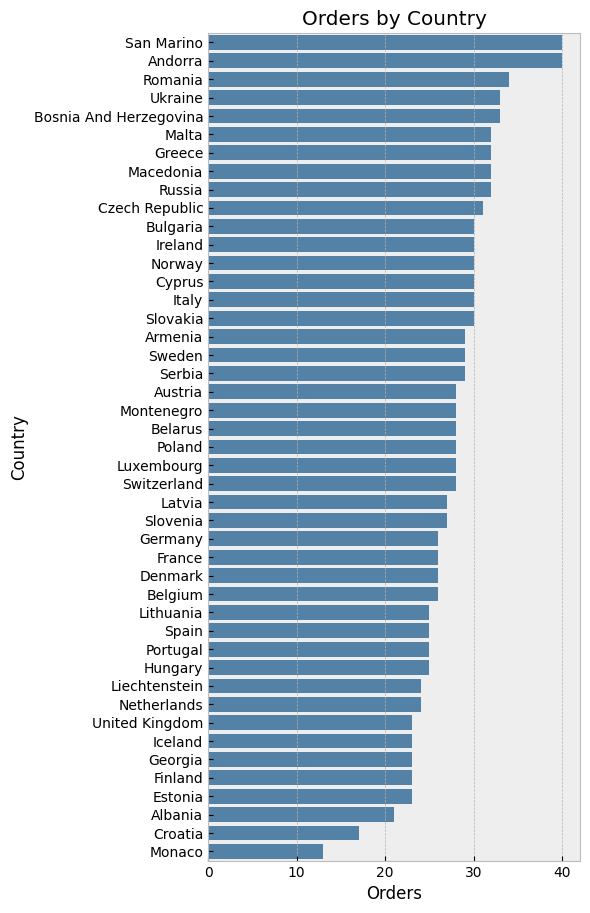

In [ ]:
revenue_by_country = data.groupby("country")["units_sold"].count().sort_values(ascending=False).reset_index()

plt.figure(figsize=(6, 9))
sns.barplot(data=revenue_by_country, x="units_sold", y="country", errorbar=("ci", False), color="steelblue")
plt.tight_layout()
plt.style.use("bmh")
plt.title("Orders by Country")
plt.ylabel("Country")
plt.xlabel("Orders")

plt.show()

Аналіз кількості замовлень за країнами демонструє значну нерівномірність розподілу. Лідерами за кількістю замовлень є **Sun Marino** та **Andorra**, що може свідчити про їхню особливу важливість для даного бізнесу. Водночас, деякі країни, такі як **Monaco**, мають незначну кількість замовлень, що може вказувати на потребу в додатковому дослідженні та можливому перегляді стратегій для цих регіонів. Загалом, графік наочно ілюструє географічну концентрацію замовлень та дозволяє визначити пріоритетні ринки для подальшого розвитку.

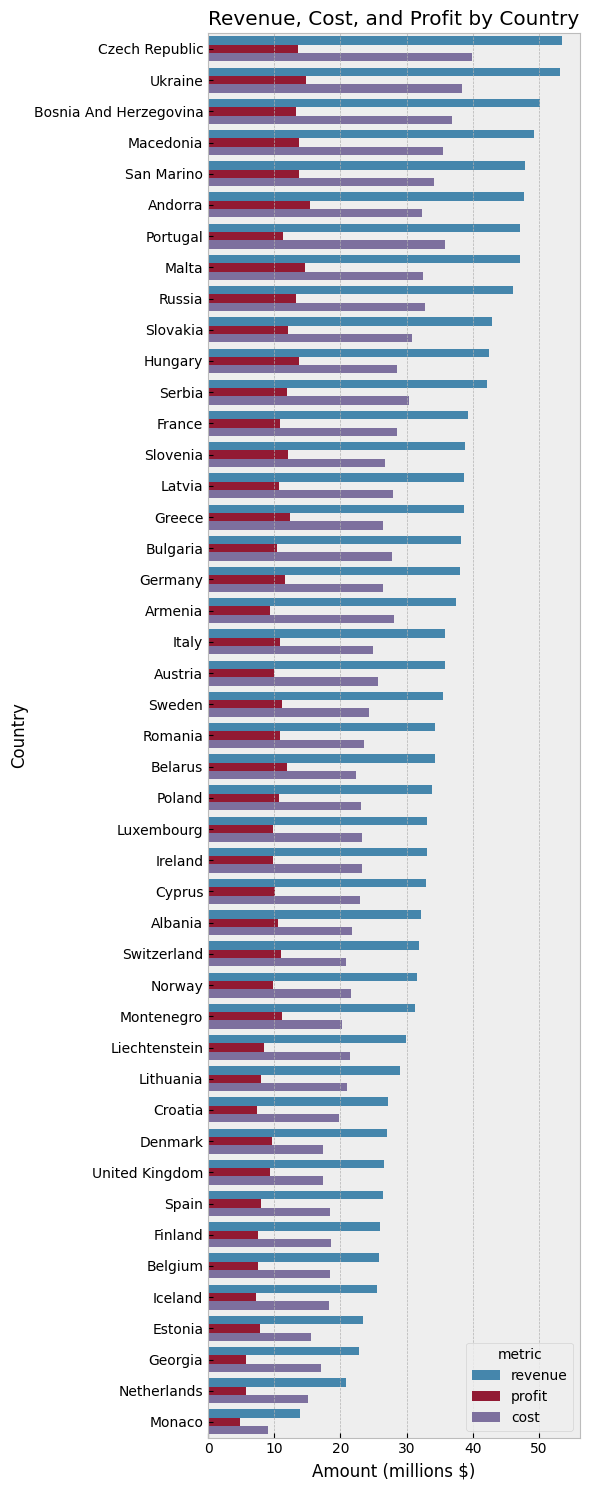

In [ ]:
amount_by_country = data.groupby("country")[["revenue", "cost", "profit"]].sum().sort_values(by="revenue", ascending=False).reset_index()
amount_by_country_melted = pd.melt(amount_by_country,
                                      id_vars="country",
                                      value_vars=["revenue", "profit", "cost"],
                                      var_name="metric",
                                      value_name="amount")

plt.figure(figsize=(6, 15))
plt.style.use("bmh")
sns.barplot(data=amount_by_country_melted, y="country", x="amount", hue="metric")
plt.title("Revenue, Cost, and Profit by Country")
plt.ylabel("Country")
plt.xlabel("Amount (millions $)")
plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))
plt.tight_layout()
plt.show()

Аналіз фінансових показників за країнами виявляє значну різницю між ними. **Czech Republic** та **Ukraine** є лідерами за доходами, прибутком та витратами, що свідчить про їх ключову роль у генерації прибутку. Водночас, деякі країни, як-от **Monaco**, мають значно нижчі показники, що може вказувати на потребу в оптимізації стратегій або перегляді їхньої важливості для бізнесу.

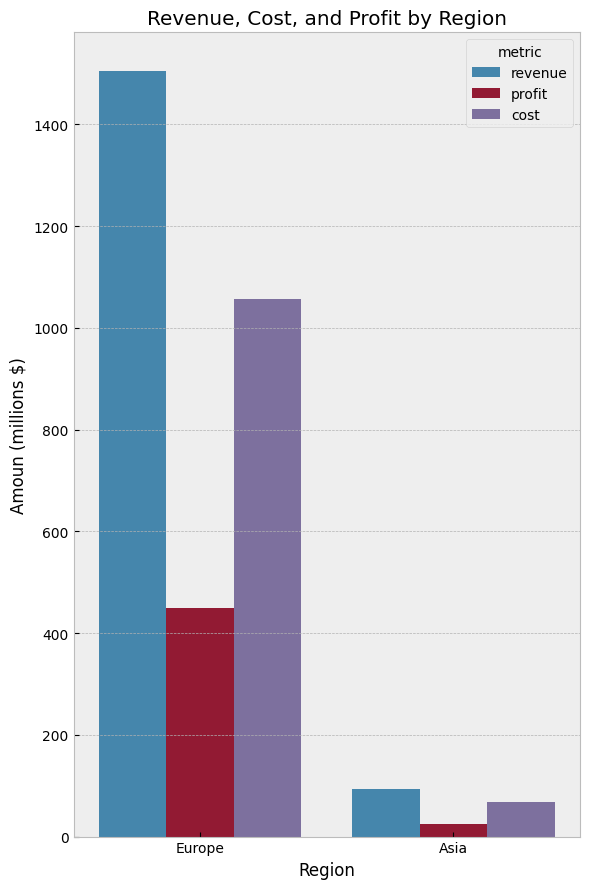

In [ ]:
amount_by_region = data.groupby("region")[["revenue", "cost", "profit"]].sum().sort_values(by="revenue", ascending=False).reset_index()
amount_by_region_melted = pd.melt(amount_by_region,
                                      id_vars="region",
                                      value_vars=["revenue", "profit", "cost"],
                                      var_name="metric",
                                      value_name="amount")

plt.figure(figsize=(6, 9))
sns.barplot(data=amount_by_region_melted, x="region", y="amount", hue="metric")
plt.title("Revenue, Cost, and Profit by Region")
plt.xlabel("Region")
plt.ylabel("Amoun (millions $)")
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))
plt.tight_layout()
plt.style.use("bmh")
plt.show()

Аналіз фінансових показників за регіонами чітко демонструє домінування **Європи** над **Азією**. Європа генерує значно більші доходи, прибуток та має вищі витрати, що свідчить про її ключову роль у бізнесі. Водночас, **Азія** демонструє значно нижчі показники, що може вказувати на потенціал зростання за умови ефективних стратегій.

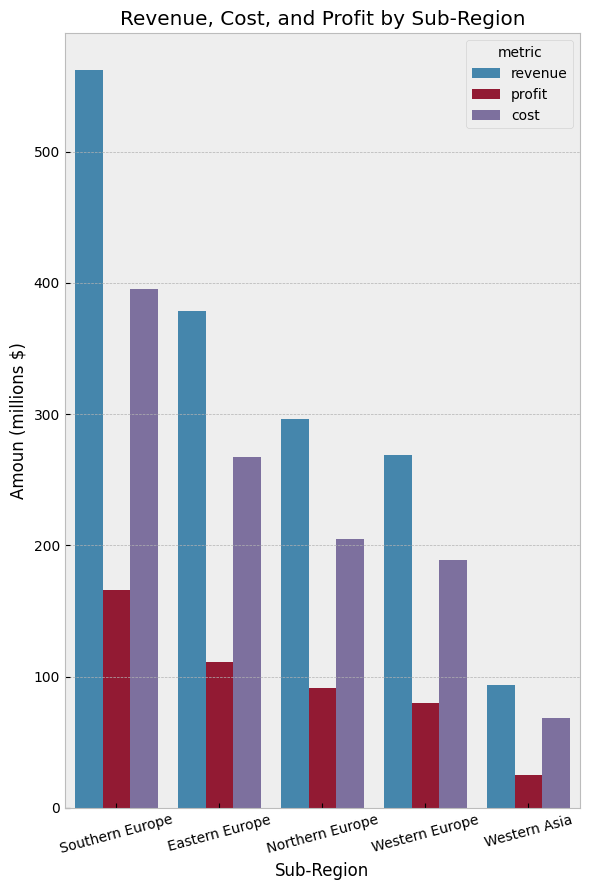

In [ ]:
amount_by_sub_region = data.groupby("sub_region")[["revenue", "cost", "profit"]].sum().sort_values(by="revenue", ascending=False).reset_index()
amount_by_sub_region_melted = pd.melt(amount_by_sub_region,
                                      id_vars="sub_region",
                                      value_vars=["revenue", "profit", "cost"],
                                      var_name="metric",
                                      value_name="amount")

plt.figure(figsize=(6, 9))
plt.style.use("bmh")
sns.barplot(data=amount_by_sub_region_melted, x="sub_region", y="amount", hue="metric")
plt.title("Revenue, Cost, and Profit by Sub-Region")
plt.xlabel("Sub-Region")
plt.xticks(rotation=15)
plt.ylabel("Amoun (millions $)")
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))
plt.tight_layout()
plt.show()

Аналіз фінансових показників за регіонами демонструє значні відмінності. **Southern Europe** лідирує за всіма показниками, включаючи дохід, прибуток та витрати, що свідчить про її ключову роль у бізнесі. **Western Asia**, навпаки, демонструє найнижчі показники, що може вказувати на потребу в перегляді стратегії розвитку в цьому регіоні. **Eastern Europe** та **Northern Europe** займають проміжне положення, демонструючи різні рівні ефективності.

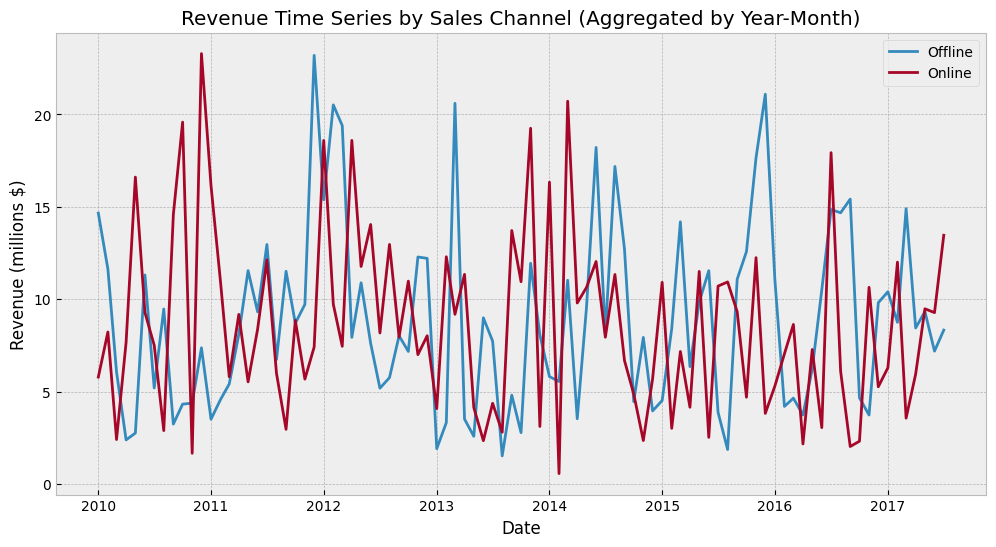

In [ ]:
data["year_month"] = data["order_date"].dt.to_period("M")
monthly_data = data.groupby(["sales_channel", "year_month"])["revenue"].sum().reset_index()
monthly_data["year_month"] = monthly_data["year_month"].dt.to_timestamp()

channels = monthly_data["sales_channel"].unique()

plt.figure(figsize=(12, 6))
for channel in channels:
    channel_data = monthly_data[monthly_data["sales_channel"] == channel]
    plt.plot(channel_data["year_month"], channel_data["revenue"], label=channel)

plt.style.use("bmh")
plt.xlabel("Date")
plt.ylabel("Revenue (millions $)")
plt.title("Revenue Time Series by Sales Channel (Aggregated by Year-Month)")
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))
plt.grid(True)
plt.legend()
plt.show()

Аналіз **Revenue Time Series by Sales Channel** виявляє значну волатильність, що ускладнює виявлення чітких трендів. Обидва канали продажів демонструють періодичні сплески та падіння доходів, що може бути пов'язано із сезонними факторами або маркетинговими кампаніями. Онлайн-канал продажів, в цілому, демонструє трохи вищі доходи, проте офлайн-канал також має періоди значного зростання.

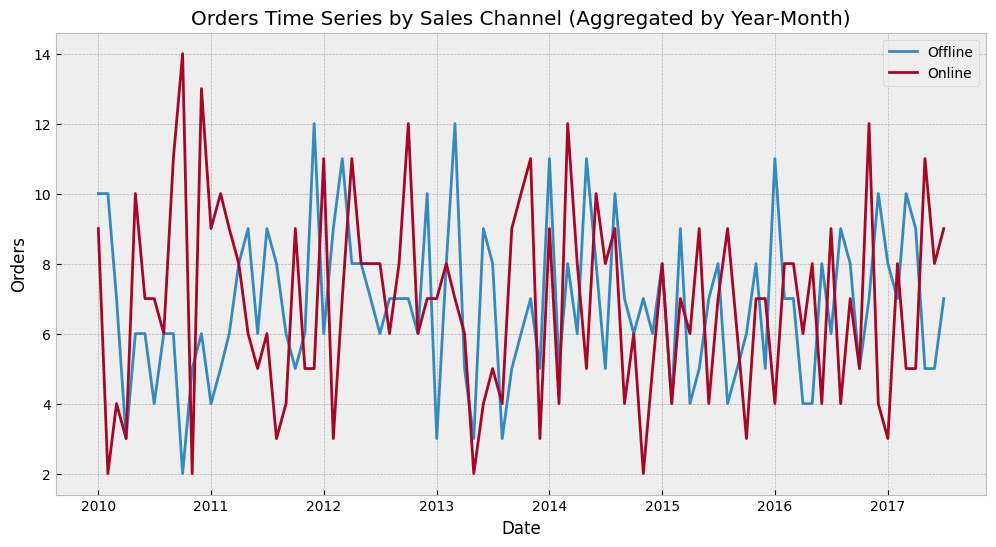

In [ ]:
data["year_month"] = data["order_date"].dt.to_period("M")
monthly_data = data.groupby(["sales_channel", "year_month"])["units_sold"].count().reset_index()
monthly_data["year_month"] = monthly_data["year_month"].dt.to_timestamp()

channels = monthly_data["sales_channel"].unique()

plt.figure(figsize=(12, 6))
for channel in channels:
    channel_data = monthly_data[monthly_data["sales_channel"] == channel]
    plt.plot(channel_data["year_month"], channel_data["units_sold"], label=channel)

plt.style.use("bmh")
plt.xlabel("Date")
plt.ylabel("Orders")
plt.title("Orders Time Series by Sales Channel (Aggregated by Year-Month)")
plt.grid(True)
plt.legend()
plt.show()

Аналіз **Orders Time Series by Sales Channel** виявляє значну волатильність та відсутність чітко виражених трендів. Обидва канали продажів демонструють періодичні сплески та падіння, що може свідчити про сезонність або вплив зовнішніх факторів. При цьому спостерігається деяке переважання онлайн-каналу у періоди пікового зростання.

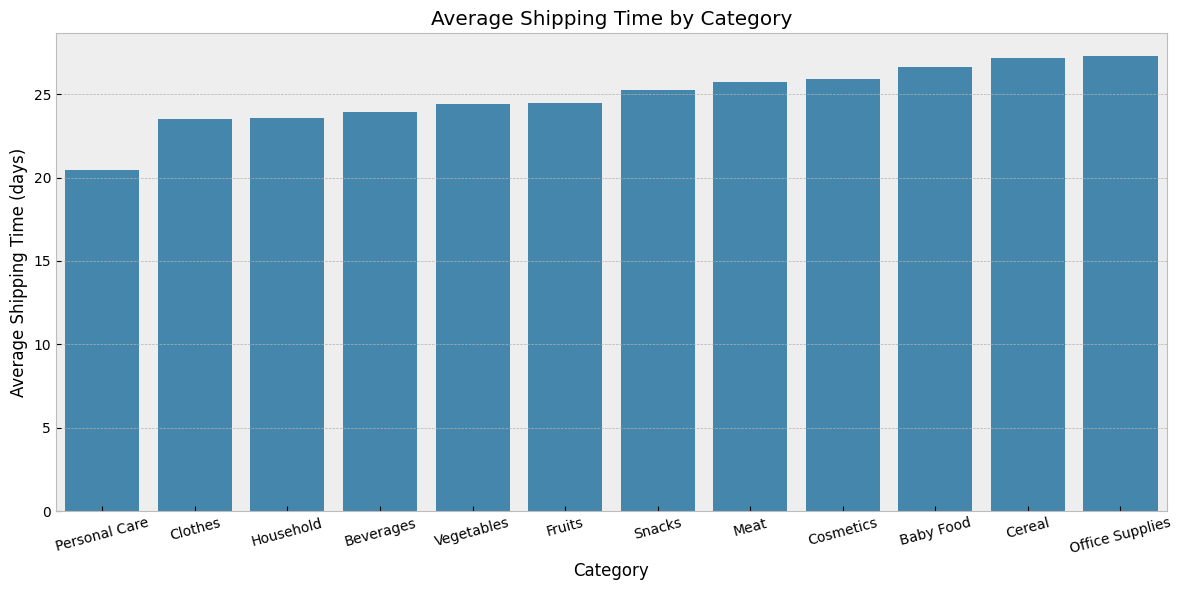

In [ ]:
shipping_time_by_category = data.groupby("item_type")["delivery_time"].mean().sort_values().reset_index()

plt.style.use("bmh")
plt.figure(figsize=(12, 6))
sns.barplot(x="item_type", y="delivery_time", data=shipping_time_by_category)
plt.title("Average Shipping Time by Category")
plt.xlabel("Category")
plt.ylabel("Average Shipping Time (days)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Графік "**Average Shipping Time by Category**" показує, що найдовший середній час доставки мають категорії **office supplie**s та **cereal**, тоді як найкоротший час доставки спостерігається для категорій **personal care** та **clothes**. Категорії **baby food**, **cosmetics** та **meat** також мають досить тривалий час доставки. Для покращення логістичних процесів компанії, варто звернути увагу на категорії з найдовшим часом доставки та проаналізувати причини затримок, можливо, шляхом оптимізації маршрутів, використання швидших методів доставки або покращення управління запасами.

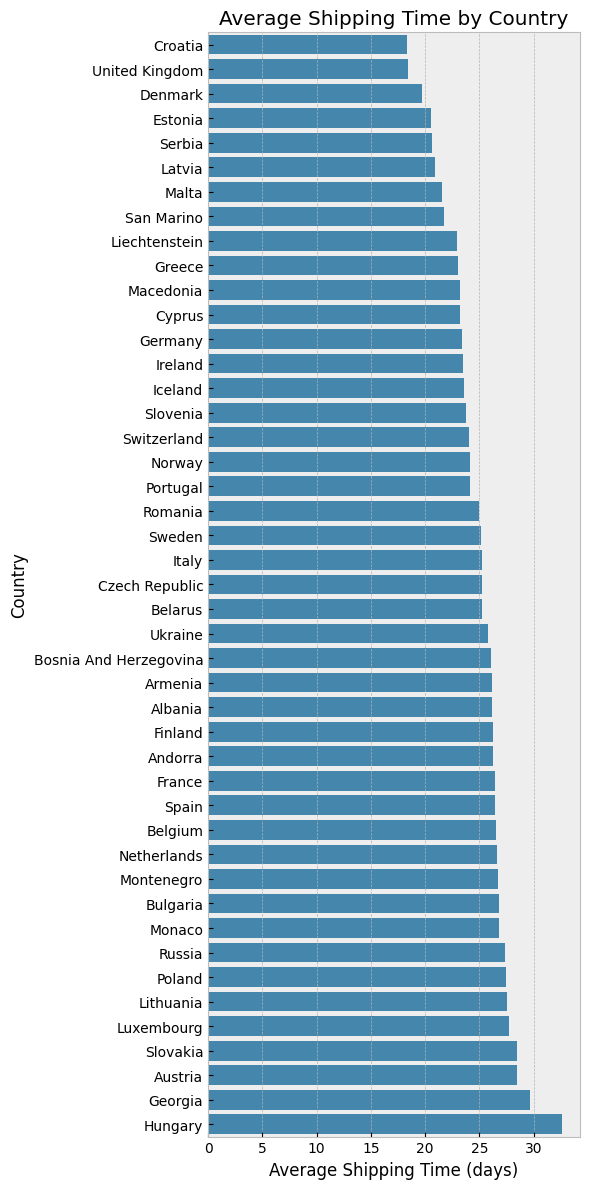

In [ ]:
shipping_time_by_category = data.groupby("country")["delivery_time"].mean().sort_values().reset_index()

plt.style.use("bmh")
plt.figure(figsize=(6, 12))
sns.barplot(y="country", x="delivery_time", data=shipping_time_by_category)
plt.title("Average Shipping Time by Country")
plt.ylabel("Country")
plt.xlabel("Average Shipping Time (days)")
plt.tight_layout()
plt.show()

Графік "**Average Shipping Time by Country**" показує, що найдовший середній час доставки спостерігається для **Угорщини**, тоді як найкоротший час доставки мають **Хорватія** та **Великобританія**. Деякі країни, такі як **Україна**, **Білорусь** та **Боснія і Герцеговина**, також мають досить тривалий час доставки.

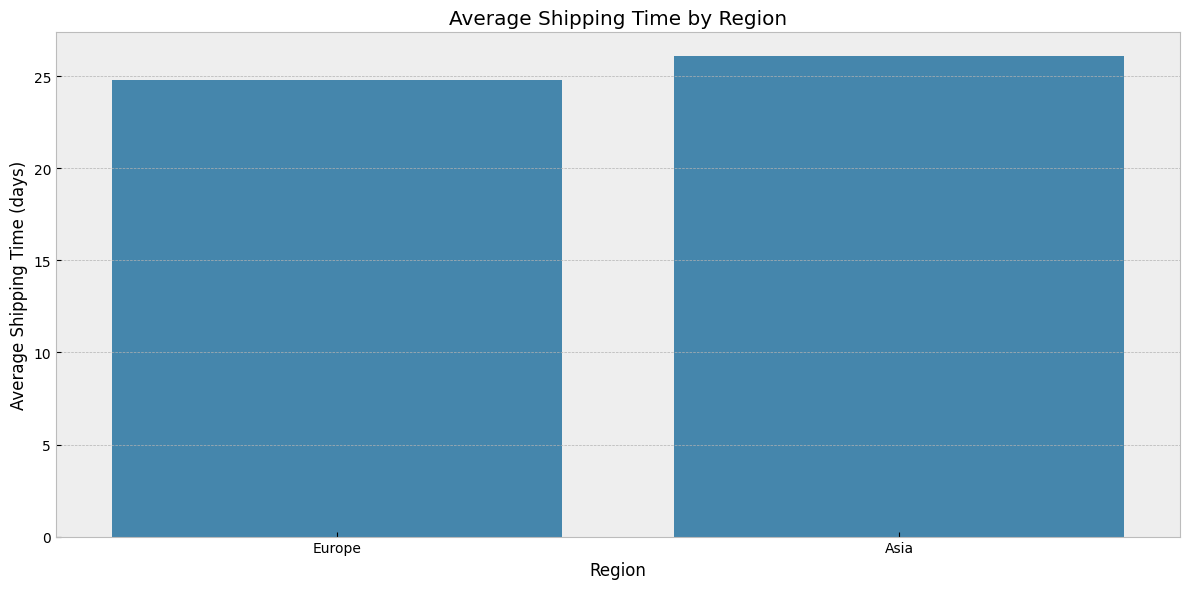

In [ ]:
shipping_time_by_category = data.groupby("region")["delivery_time"].mean().sort_values().reset_index()

plt.style.use("bmh")
plt.figure(figsize=(12, 6))
sns.barplot(x="region", y="delivery_time", data=shipping_time_by_category)
plt.title("Average Shipping Time by Region")
plt.xlabel("Region")
plt.ylabel("Average Shipping Time (days)")
plt.tight_layout()
plt.show()

Графік "**Average Shipping Time by Region**" показує, що середній час доставки майже однаковий для регіонів **Europe** та **Asia**. Обидва регіони мають середній час доставки близько 25 днів. Це може свідчити про те, що компанія має налагоджену систему доставки, яка працює з однаковою ефективністю в обох регіонах.

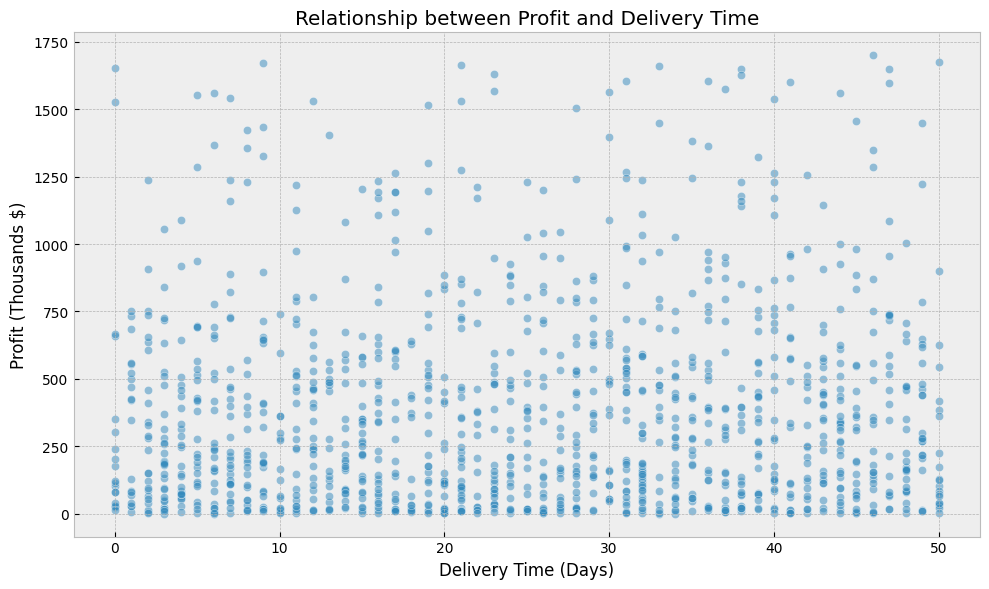

Кореляція між прибутком та часом відвантаження: 0.06


In [ ]:
plt.style.use("bmh")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="delivery_time", y="profit", data=data, alpha=0.5)
plt.title("Relationship between Profit and Delivery Time")
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Profit (Thousands $)")
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000)))
plt.tight_layout()
plt.show()

correlation = data["delivery_time"].corr(data["profit"])
print(f"Кореляція між прибутком та часом відвантаження: {correlation:.2f}")

Графік "**Relationship between Profit and Delivery Time**" показує відсутність чіткої залежності між прибутком та часом доставки. Точки розкидані хаотично по всій площині графіку, без будь-якої тенденції або кореляції. Це підтверджується значенням кореляції, яке дорівнює **0.06**, що свідчить про дуже слабкий зв'язок між цими двома змінними. Можна зробити висновок, що час доставки не є значущим фактором, який впливає на прибуток. Компанія може отримувати високий прибуток як при швидкій, так і при повільній доставці.

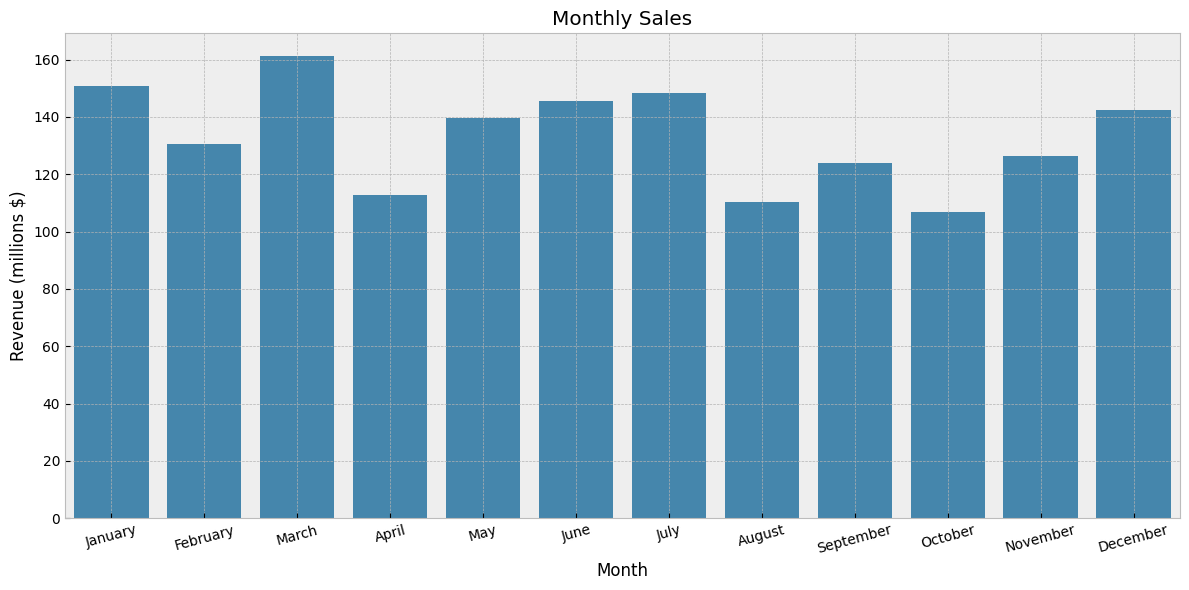

In [ ]:
data['month'] = data['order_date'].dt.month
monthly_sales = data.groupby('month')['revenue'].sum().reset_index()

months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
plt.style.use("bmh")
sns.barplot(x="month", y="revenue", data=monthly_sales)

plt.xticks(monthly_sales.index, months, rotation=15)

plt.xlabel('Month')
plt.ylabel("Revenue (millions $)")
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))
plt.title('Monthly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

Графік "**Monthly Sales**" чітко показує значний пік продажів у **березні**.
Крім березня, інші місяці мають відносно стабільний рівень продажів, без значних коливань. Можна припустити, що березень є місяцем найактивніших продажів, можливо, через сезонні фактори, святкові дні або спеціальні акції.

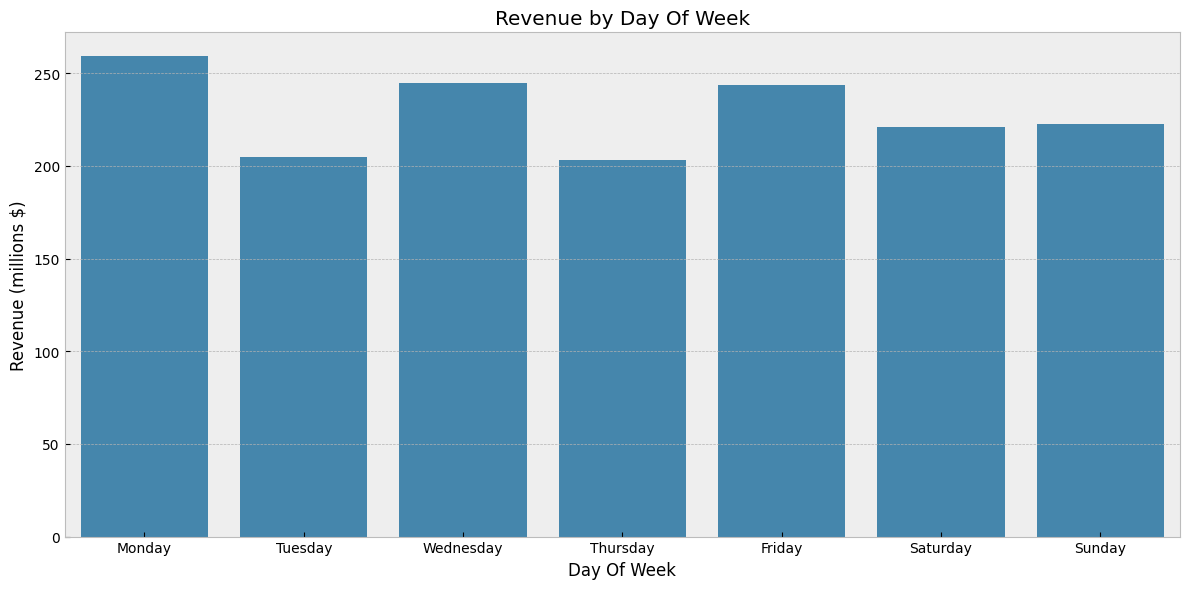

Кореляція між виручкою та днем тижня: -0.04


In [ ]:
sales_by_day = data.groupby("day_of_week", observed=False)["revenue"].sum().reset_index()

plt.style.use("bmh")
plt.figure(figsize=(12, 6))
sns.barplot(x="day_of_week", y="revenue", data=sales_by_day)
plt.title("Revenue by Day Of Week")
plt.xlabel("Day Of Week")
plt.ylabel("Revenue (millions $)")
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))
plt.tight_layout()

plt.show()

correlation = data['day_of_week_num'].corr(data['revenue'])
print(f"Кореляція між виручкою та днем тижня: {correlation:.2f}")

На графіку **"Revenue by Day of Week"** чітко видно, що найбільший прибуток спостерігається у понеділок.  Інші дні тижня, з вівторка по неділю, мають відносно стабільний рівень виручки, без значних коливань. Коефіцієнт кореляції (**-0.04**) підтверджує візуальне спостереження, вказуючи на дуже слабку негативну кореляцію між днем тижня (в числовому представленні) та виручкою. Це означає, що немає значущого зв'язку між цими двома змінними.

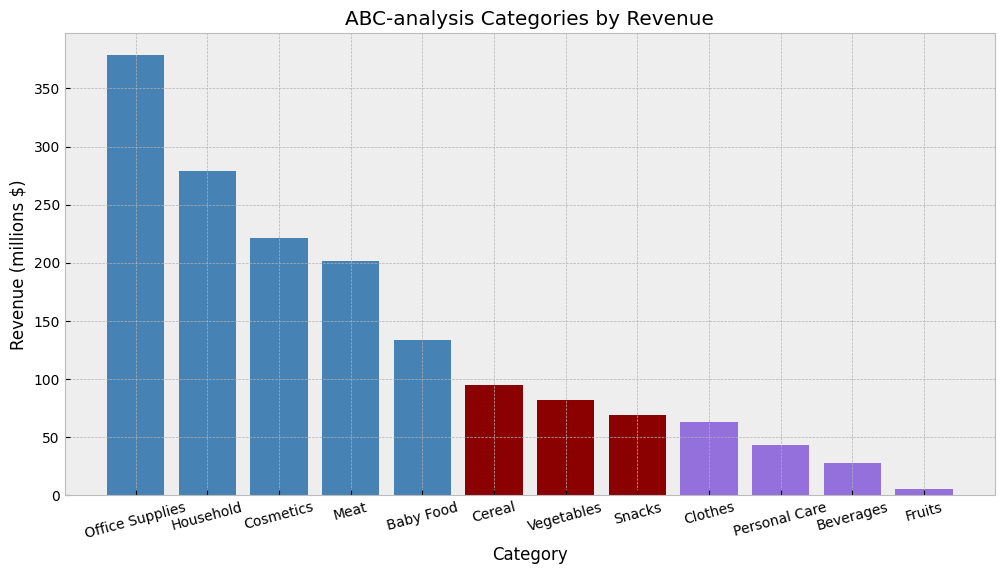

In [ ]:
category_revenue = data.groupby("item_type")["revenue"].sum()
category_revenue = category_revenue.sort_values(ascending=False)

category_revenue = category_revenue.to_frame()
category_revenue["cumulative_percentage"] = category_revenue["revenue"].cumsum() / category_revenue["revenue"].sum() * 100

def assign_category(percentage):
    if percentage <= 80:
        return "A"
    elif percentage <= 95:
        return "B"
    else:
        return "C"

category_revenue["category"] = category_revenue["cumulative_percentage"].apply(assign_category)

color_map = {"A": "#4682B4",  # Steel Blue
             "B": "#8B0000",  # Dark Red
             "C": "#9370DB"}  # Medium Purple

plt.style.use("bmh")
plt.figure(figsize=(12, 6))
plt.bar(category_revenue.index, category_revenue["revenue"], color=category_revenue["category"].map(color_map))

plt.xlabel("Сategory")
plt.ylabel("Revenue (millions $)")
plt.title("ABC-analysis Categories by Revenue")
plt.xticks(rotation=15)
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))
plt.show()

Графік демонструє **ABC-аналіз** категорій за їх внеском у загальний дохід. Категорії з найбільшим доходом, такі як **Office Supplies**, **Cosmetics**,  **Household**, **Meat** та **Baby Food** потрапляють до групи **A** (сині стовпчики). Ці категорії є ключовими для бізнесу, оскільки вони генерують значну частину доходу. Категорії **Cereal**, **Vegetables**, **Snacks**,  відносяться до групи **B** (червоні стовпчики відповідно). Вони мають менший внесок у загальний дохід, але все ще є важливими для підтримки асортименту та задоволення потреб різних сегментів клієнтів. Категорії **Clothes**, **Personal Care**, **Beverages** та **Fruits** відносяться до групи **С** (фіолетові стовпчики) мають найнижчий дохід та, ймовірно, потребують оптимізації або перегляду стратегії для підвищення їх прибутковості. Цей аналіз допомагає ідентифікувати пріоритетні категорії для бізнесу та зосередити зусилля на підтримці та розвитку найбільш прибуткових напрямків.

### **Результати аналізу та висновки**:
1. **Продажі за категоріями**
* **Лідери за прибутком**:
Найвищий прибуток демонструють категорії Office Supplies, Cosmetics та Household.
* **Найнижчий прибуток**:
Категорії Fruits, Beverages та Personal Care.
2. Продажі за регіонами
* **Європа**: Лідер за кількістю замовлень та прибутком.
* **Азія**: Значно менші показники по замовленням і прибутком.
3. **Канали продажів**
* **Онлайн та офлайн**: Розподіл доходів майже рівний
4. **Тривалість доставки**
* **Найшвидші категорії**: Personal Care, Clothes та Household.
* **Найдовші**: Cereal, Baby Food, Office Supplies.
* **Тривалість доставки**: Середній термін однаковий для обох каналів – 25 днів.
5. **Метрики за місяцями та днями**
* **Найприбутковіші місяці**: Січень і березень.
* **Дні тижня**: Найвищий дохід у понеділок, середу і п'ятницю.
6. **АВС-аналіз категорій**
* Категорії "A" (80% впливу):
Найбільший вплив на продажі мають Office Supplies, Cosmetics,  Household, Meat та Baby Food.
* Категорії "B" (додаткові 15%): Включають Cereal, Vegetables, Snacks.
* Категорії "C" (>95%): Найменший вплив у  Clothes, Personal Care, Beverages та Fruits.

### **Висновки з погляду бізнес-логіки**:
**Оптимізація продуктів**:
* Зосередитись на високоприбуткових категоріях ("A"), таких як Cosmetics, Household та Office Supplies, для максимізації доходу.

**Посилення каналів**:
* Збалансований розподіл доходів між онлайн та офлайн показує можливість посилення обох каналів для росту.

**Покращення логістики**:
* Прискорення доставки в категоріях з тривалим терміном (наприклад, Office Supplies) може підвищити задоволеність клієнтів.

**Фокус на регіони**:
* Європа має найбільший потенціал для росту продажів; можна дослідити причини низької ефективності в Азії.

**Сезонне планування**:
* Збільшення активності в січні та березні вказує на необхідність акценту маркетингу в ці місяці.
